# Decision Trees
## 1. Import Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

from sklearn.model_selection import train_test_split

# 2. Import Data

In [50]:
path=r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## 3. Pre-processing Data

Add Dummy-Variables for Categories and non-numeric values

In [51]:
X = df.drop('Drug',axis=1)
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [52]:
dummy = pd.get_dummies(X, columns=X.columns[(X.dtypes == 'object') | (X.dtypes == 'category')])
X = pd.DataFrame(data=dummy)
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [53]:
y = df['Drug']
y = pd.DataFrame(data=y)
y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [54]:
dummy = pd.get_dummies(y, columns=y.columns[(y.dtypes == 'object') | (y.dtypes == 'category')])
y = pd.DataFrame(data=dummy)
y.head()

,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


## 4. Split Data Into Training & Test

In [55]:
# random_state is the seed for reproduction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## 5. Algorithm & Optimization

Decision Tree

In [56]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
predTree = drugTree.predict(X_test)

In [61]:
print (predTree [0:5])
print (y_test [0:5])

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
     Drug_drugA  Drug_drugB  Drug_drugC  Drug_drugX  Drug_drugY
40            0           0           0           0           1
51            0           0           0           1           0
139           0           0           0           1           0
197           0           0           0           1           0
170           0           0           0           1           0


In [63]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


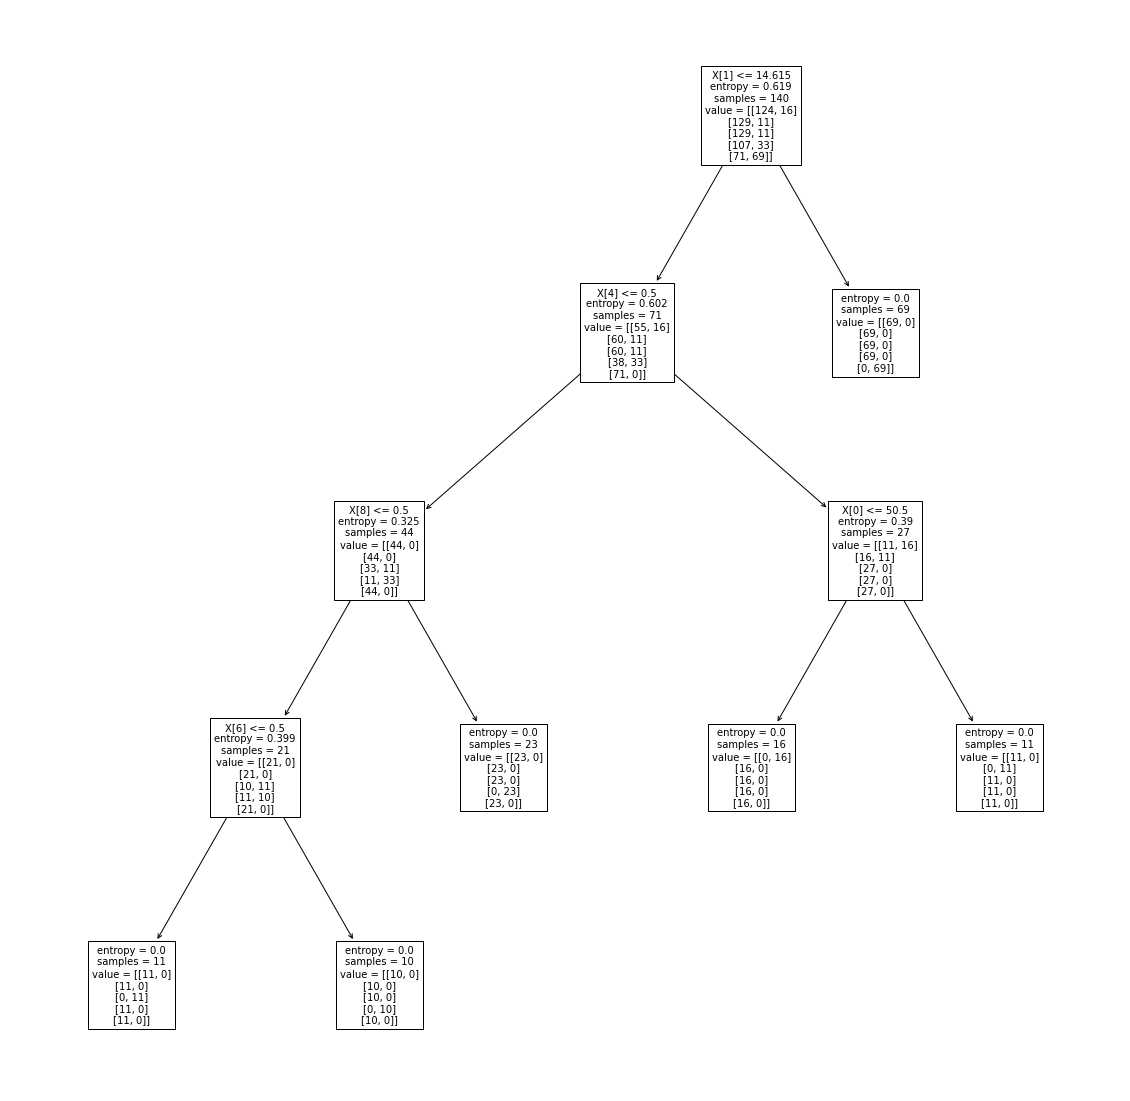

In [70]:
tree.plot_tree(drugTree, fontsize = 10)
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('tree.png')
plt.show()